#SMA Percent Band

    1. The SPY is closes above its upper band, buy
    2. If the SPY closes below its lower band, sell your long position.
    
    (optimize band)

In [45]:
%matplotlib inline

Use future imports for python 3.0 forward compatibility

In [46]:
from __future__ import print_function
from __future__ import unicode_literals
from __future__ import division
from __future__ import absolute_import

Other imports

In [47]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import datetime
from talib.abstract import *
import pinkfish as pf
import strategy

# format price data
pd.options.display.float_format = '{:0.2f}'.format

# Double the DPI, so we are making 2x plots:
matplotlib.rcParams['savefig.dpi'] = 2 * matplotlib.rcParams['savefig.dpi']

Some global data

In [48]:
symbol = '^GSPC'
#symbol = 'SPY'
#symbol = 'DIA'
#symbol = 'QQQ'
#symbol = 'IWM'
#symbol = 'TLT'
#symbol = 'GLD'
#symbol = 'AAPL'
#symbol = 'BBRY'
#symbol = 'GDX'
capital = 10000
start = datetime.datetime(1900, 1, 1)
#end = datetime.datetime(2005, 12, 1)
end = datetime.datetime.now()

Define percent bands

In [49]:
bands = range(0, 100, 5)
bands = [str(band) for band in bands]

Run Strategy

In [50]:
strategies = pd.Series()
for band in bands:
    print("{0}".format(band), end=" ")
    strategies[band] = strategy.Strategy(symbol, capital, start, end, sma_period=200, percent_band=int(band)/10)
    strategies[band].run()
    strategies[band].tlog, strategies[band].dbal = strategies[band].get_logs()
    strategies[band].stats = strategies[band].stats()

0 5 10 15 20 25 30 35 40 45 50 55 60 65 70 75 80 85 90 95 

Summarize results

In [51]:
metrics = ('annual_return_rate',
           'max_closed_out_drawdown',
           'drawdown_annualized_return',
           'drawdown_recovery',
           'best_month',
           'worst_month',
           'sharpe_ratio',
           'sortino_ratio',
           'monthly_std',
           'pct_time_in_market',
           'total_num_trades',
           'pct_profitable_trades',
           'avg_points')

df = strategy.summary(strategies, *metrics)
df

,0,5,10,15,20,25,30,35,40,45,50,55,60,65,70,75,80,85,90,95
annual_return_rate,7.51,7.36,7.48,7.28,7.00,7.41,7.53,7.61,7.29,7.47,7.41,6.97,6.58,6.47,6.04,6.08,5.97,6.30,6.67,6.59
max_closed_out_drawdown,-28.26,-24.16,-22.21,-22.47,-21.54,-25.38,-25.08,-21.35,-21.73,-21.73,-21.77,-36.89,-37.12,-37.70,-37.67,-34.27,-34.27,-34.73,-35.01,-35.54
drawdown_annualized_return,-3.76,-3.28,-2.97,-3.09,-3.08,-3.42,-3.33,-2.81,-2.98,-2.91,-2.94,-5.29,-5.64,-5.83,-6.23,-5.63,-5.74,-5.51,-5.25,-5.39
drawdown_recovery,-3.76,-1.98,-1.98,-3.76,-3.69,-3.69,-2.64,-0.99,-0.99,-0.99,-0.99,-0.99,-0.99,-1.23,-1.23,-1.52,-1.52,-1.52,-1.52,-1.52
best_month,13.42,14.93,14.92,14.92,14.93,14.94,14.92,14.94,14.55,14.55,14.55,14.52,14.55,14.51,14.49,14.52,14.49,14.54,14.55,14.55
worst_month,-11.96,-13.82,-13.83,-13.82,-13.82,-13.83,-13.83,-13.94,-13.94,-13.93,-13.94,-31.44,-31.44,-31.45,-31.42,-31.45,-31.45,-31.44,-31.47,-31.45
sharpe_ratio,0.77,0.75,0.76,0.74,0.71,0.75,0.75,0.76,0.73,0.74,0.73,0.67,0.63,0.62,0.59,0.59,0.58,0.60,0.62,0.61
sortino_ratio,0.88,0.86,0.87,0.85,0.82,0.86,0.87,0.86,0.83,0.86,0.85,0.73,0.70,0.69,0.64,0.65,0.64,0.67,0.71,0.71
monthly_std,2.89,2.94,2.93,2.94,2.96,2.95,2.95,2.97,2.97,3.00,3.03,3.17,3.19,3.20,3.24,3.24,3.26,3.29,3.33,3.38
pct_time_in_market,71.12,70.54,69.93,70.02,70.25,69.92,70.40,70.66,70.35,72.14,73.58,73.99,74.60,74.84,75.02,75.26,75.96,77.55,78.71,80.90


Bar graphs

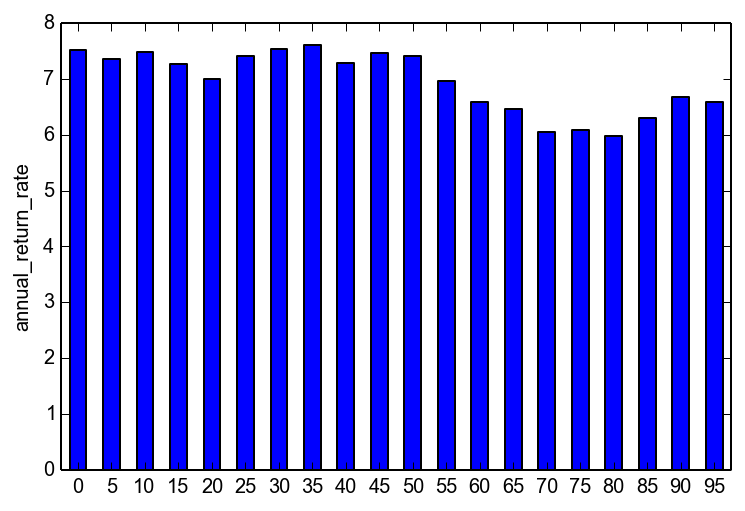

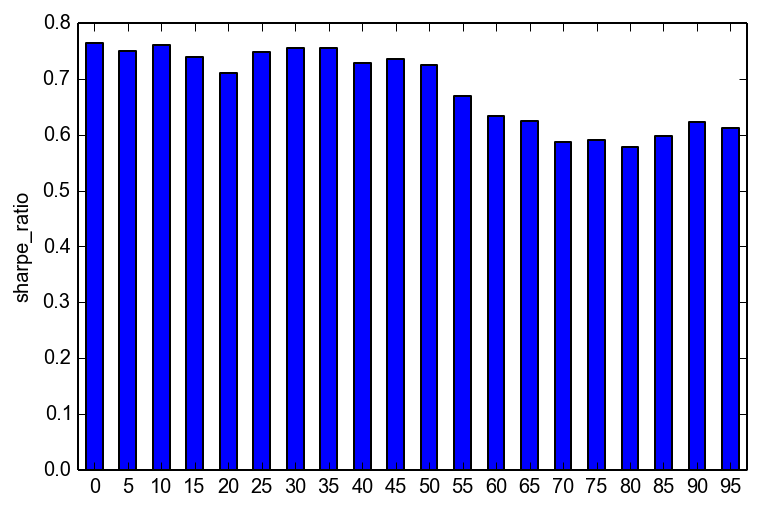

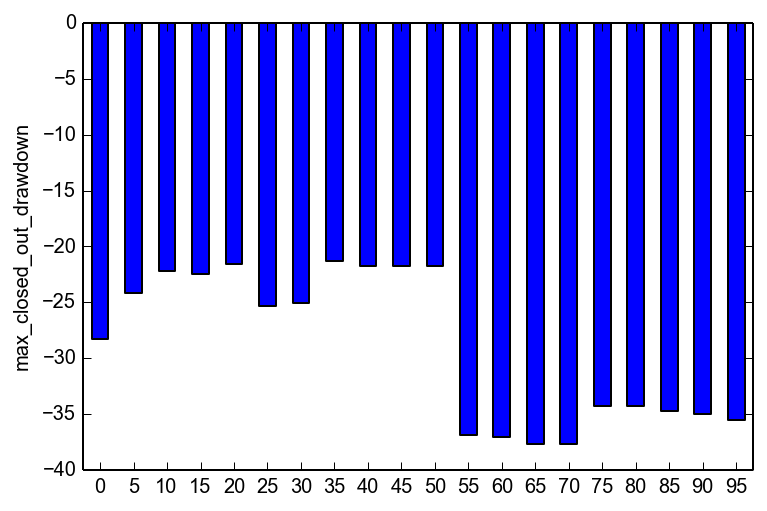

In [52]:
strategy.plot_bar_graph(df, 'annual_return_rate')
strategy.plot_bar_graph(df, 'sharpe_ratio')
strategy.plot_bar_graph(df, 'max_closed_out_drawdown')

Run Benchmark

In [53]:
s = strategies[bands[0]]
benchmark = pf.Benchmark(symbol, capital, s._start, s._end)
benchmark.run()
benchmark.tlog, benchmark.dbal = benchmark.get_logs()
benchmark.stats = benchmark.stats()

1950-10-18 00:00:00 BUY  499 ^GSPC @ 20.01
2015-05-29 00:00:00 SELL 499.0 ^GSPC @ 2107.39


Equity curve

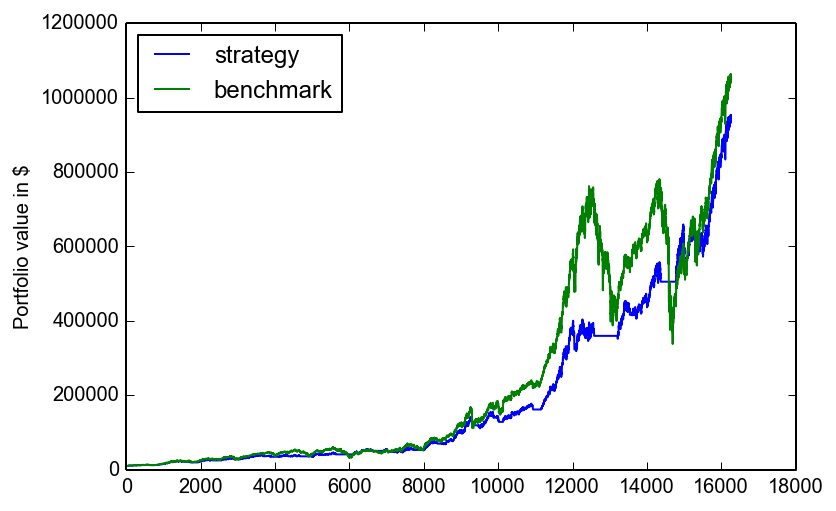

In [57]:
pf.plot_equity_curve(strategies['40'].dbal, benchmark=benchmark.dbal)